In [9]:
# Load essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [10]:
# Load the housing dataset
l = pd.read_csv("housing.csv")
l.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
# Display column names
print("Columns:", list(l.columns))

# Count missing values per column
print("\nMissing values:\n", l.isnull().sum())

Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [12]:
# Handle missing values (drop rows with missing data)
l.dropna(inplace=True)

# Display remaining null counts to confirm
print("Remaining missing values:\n", l.isnull().sum())

Remaining missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [24]:
# Using more features for better prediction
X = l[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = l['price']

# Display shapes of X and y
print("Feature matrix X shape:", X.shape)
print("Target vector y length:", len(y))

Feature matrix X shape: (545, 5)
Target vector y length: 545


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Training data: (436, 2) (436,)
Test data: (109, 2) (109,)


In [16]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 1381158.90
Mean Squared Error (MSE): 3280176595474.01
R² Score: 0.351


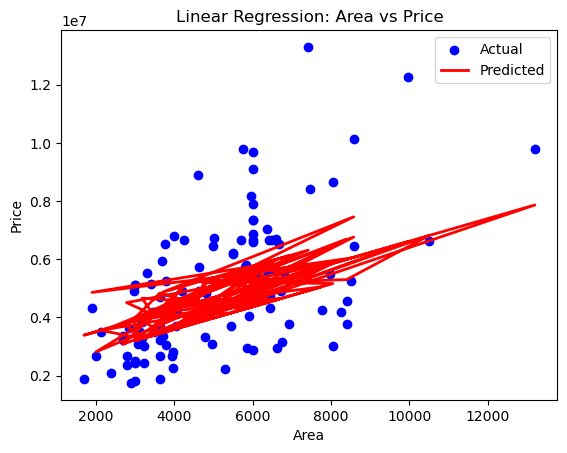

In [18]:
plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.plot(
    X_test['area'], model.predict(X_test), 
    color='red', linewidth=2, label='Predicted'
)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.show()

In [19]:
print("Intercept (b₀):", model.intercept_)
print("Coefficients (bᵢ):", dict(zip(X.columns, model.coef_)))

Intercept (b₀): 642086.4086518651
Coefficients (bᵢ): {'area': 389.2257301313303, 'bedrooms': 695678.6670515896}


In [20]:
l.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')